<a href="https://colab.research.google.com/github/code-adi56/Hydro-energy-consumption-forecast/blob/main/Hydro_energy_consumption_in_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Prediction of consumption of hydroelectricity in india based on yearly growth,electricity production and access to the person
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

df = pd.read_csv("energy.csv")
df.head()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,55.0,27.000000,16.020820,0.000000,13.500000,27.000000,40.500000,54.000000
Year,55.0,1992.000000,16.020820,1965.000000,1978.500000,1992.000000,2005.500000,2019.000000
Oil Consumption - EJ,55.0,1016.774248,779.104085,146.995250,355.923921,741.826939,1501.319649,2843.930590
Gas Consumption - EJ,55.0,202.458727,203.851164,2.372522,14.598730,144.347010,351.014406,602.859253
Coal Consumption - EJ,55.0,1820.266809,1436.636301,412.415691,618.920020,1438.257713,2503.271747,5172.222865
Solar Consumption - EJ,55.0,6.079348,20.876968,0.000000,0.000000,0.000000,0.049063,114.568933
Hydro Consumption - EJ,55.0,197.935940,91.685308,53.241536,134.730427,188.787854,275.697977,400.769761
Nuclear Consumption - EJ,55.0,32.037215,32.234864,0.000000,6.401997,17.297054,48.553898,111.833182
Wind Consumption - EJ,55.0,21.466137,40.338935,0.000000,0.000000,0.263250,20.536628,156.779866
Geo Biomass Other - EJ,55.0,13.123622,22.181239,0.000000,0.000000,0.331644,12.893916,65.313445


In [ ]:
df = df.replace(0, np.nan)
from sklearn.impute import SimpleImputer
cols_to_drop = ['Entity', 'Code']
df.drop(cols_to_drop, axis=1, inplace=True)
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
imputed_df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

imputed_df.to_csv("multivariate_imputed.csv", index=False)
df1 = pd.read_csv("multivariate_imputed.csv")
df1

selected_columns = ['Year','Hydro Consumption - EJ','Electricity from hydro (TWh)','Hydro (% electricity)']

# Delete all columns except the selected ones
columns_to_delete = df1.columns.difference(selected_columns)

df1= df1.drop(columns=columns_to_delete)
print(df1)

      Year  Hydro Consumption - EJ  Electricity from hydro (TWh)  \
0   1965.0               53.241536                     54.265813   
1   1966.0               55.598552                     54.265813   
2   1967.0               62.215381                     54.265813   
3   1968.0               71.803031                     54.265813   
4   1969.0               79.721129                     54.265813   
5   1970.0               84.545645                     54.265813   
6   1971.0               92.733818                     54.265813   
7   1972.0               90.008519                     54.265813   
8   1973.0               95.851952                     54.265813   
9   1974.0               92.230497                     54.265813   
10  1975.0              110.190461                     54.265813   
11  1976.0              115.272776                     54.265813   
12  1977.0              125.768859                     54.265813   
13  1978.0              156.041773              

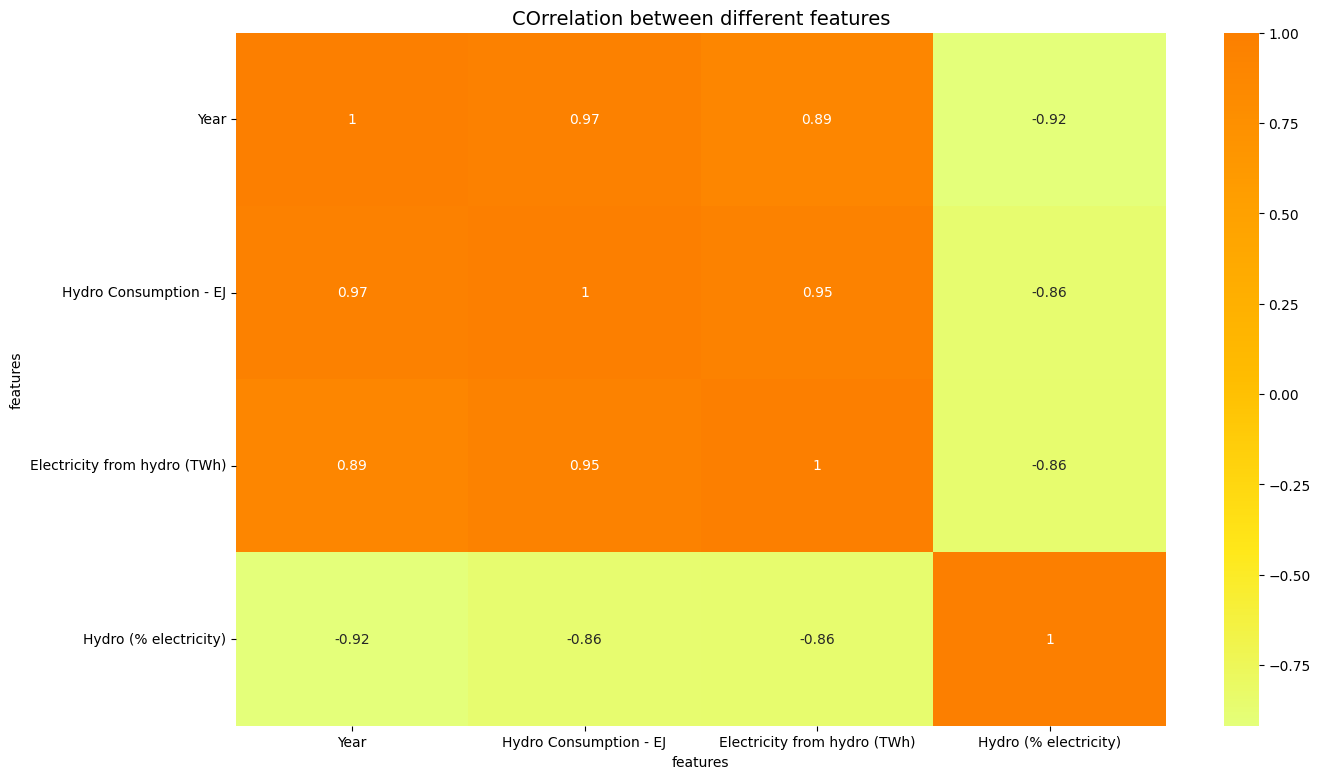

In [ ]:
X = df1.drop('Hydro Consumption - EJ',axis=1)
y= df1['Hydro Consumption - EJ']

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.values.reshape(-1, 1))

fig,ax = plt.subplots(1,1,figsize=(15,9))
sns.heatmap(df1.corr(),annot = True,cmap='Wistia')
ax.set(xlabel='features')
ax.set(ylabel='features')
plt.title('COrrelation between different features',fontsize= 14,c='black')
plt.show()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
from sklearn.metrics import r2_score
Y_pred = regressor.predict(X_test)
print(X_test , Y_pred)
# Calculate the R-squared score
r2 = r2_score(y_test, Y_pred)
print("R-squared score:", r2)

[[ 0.25197632 -0.33206996 -0.73539697]
 [-1.38586973 -0.81559373  0.94610706]
 [ 0.31497039 -0.29436464 -0.8541332 ]
 [-0.8819171  -0.81559373  0.94610706]
 [-0.50395263 -0.81559373  0.94610706]
 [ 1.38586973  1.67079215 -1.46133769]
 [ 0.8819171   1.08508917 -0.45766534]
 [-0.06299408 -0.17315865  0.70760241]
 [ 1.00790526  1.16993292 -0.68305675]
 [-0.94491118 -0.81559373  0.94610706]
 [ 1.57485197  1.85177068 -1.7020537 ]] [-0.040647   -1.28094804 -0.01869139 -0.88080085 -0.57867685  1.44796267
  1.12557557 -0.04384788  1.19730175 -0.93391787  1.47793324]
R-squared score: 0.9710514855812826
